In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sb
%matplotlib inline

In [40]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
df.isna().values.any()

False

In [42]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [43]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [44]:
df = df.sample(frac=0.45, random_state=2)

In [45]:
df['Class'].value_counts()

0    127944
1       219
Name: Class, dtype: int64

<AxesSubplot:>

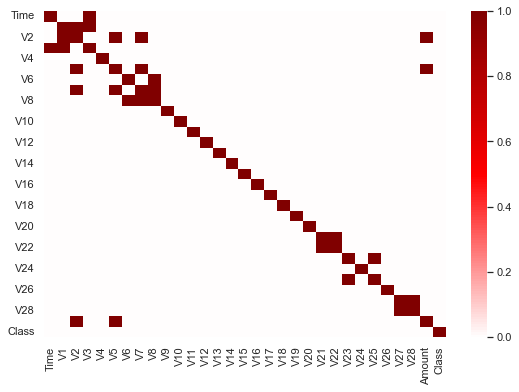

In [46]:
fig, ax1 = plt.subplots(1,1,figsize=(9,6))
sb.heatmap(np.abs(df.corr(method='spearman'))>0.3,cmap='seismic',center=0,ax=ax1)

<AxesSubplot:xlabel='Class', ylabel='count'>

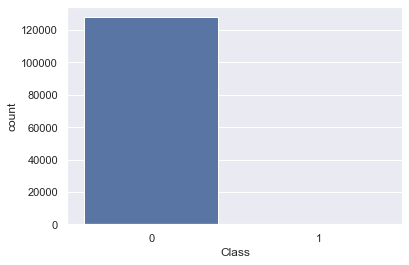

In [47]:
sb.set()
sb.countplot(x='Class',data=df)

In [48]:
df_fraud = df[df['Class']==1]
df_normal = df[df['Class']==0]

(0.0, 200000.0)

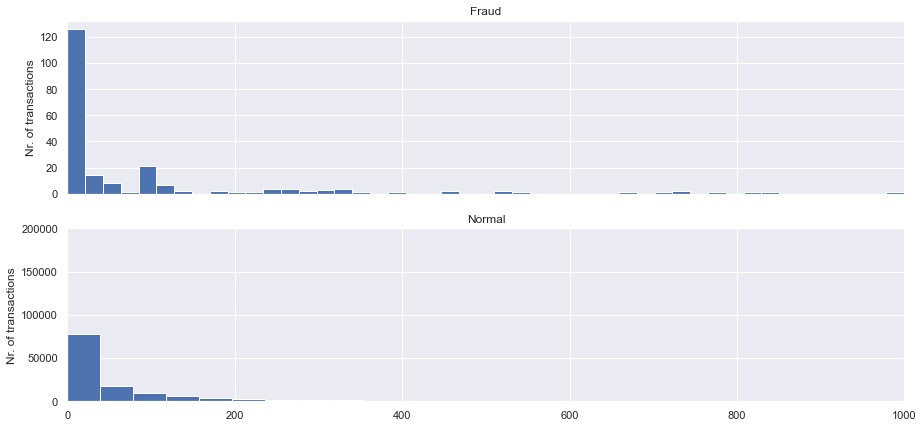

In [49]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,7),sharex=True)

ax1.hist(df_fraud['Amount'],bins=100)
ax1.set_title('Fraud')
ax1.set_ylabel('Nr. of transactions')

ax2.hist(df_normal['Amount'],bins=500)
ax2.set_title('Normal')
ax2.set_ylabel('Nr. of transactions')

plt.xlim((0,1000))
plt.ylim((0,200000))


Text(0.5, 0, 'Time')

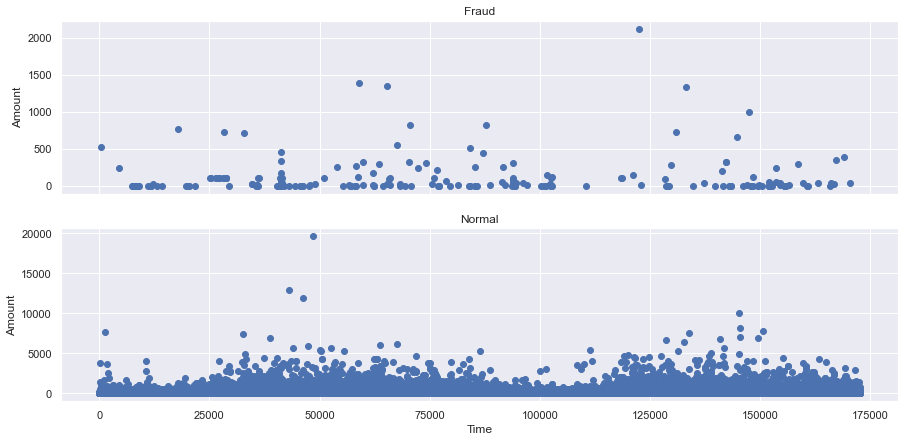

In [50]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,7),sharex=True)

ax1.scatter(df_fraud['Time'],df_fraud['Amount'])
ax1.set_title('Fraud')
ax1.set_ylabel('Amount')

ax2.scatter(df_normal['Time'],df_normal['Amount'])
ax2.set_title('Normal')
ax2.set_ylabel('Amount')

ax2.set_xlabel('Time')


Text(0.5, 0, 'V2')

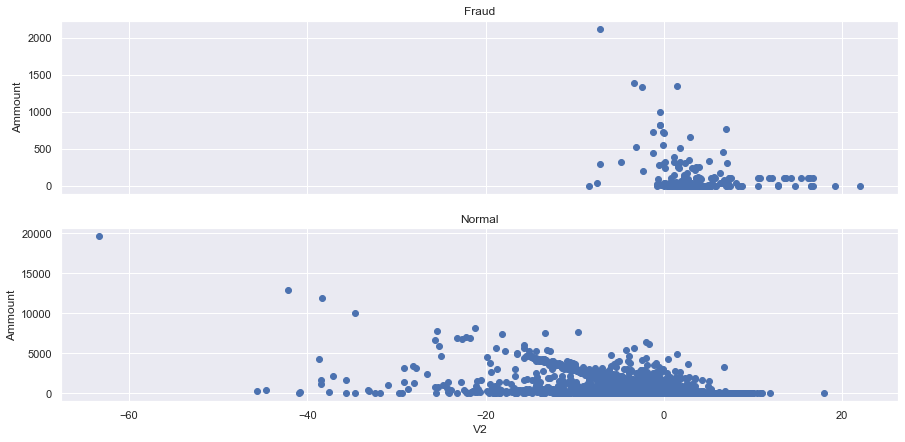

In [51]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,7),sharex=True)

ax1.scatter(df_fraud['V2'],df_fraud['Amount'])
ax1.set_title('Fraud')
ax1.set_ylabel('Ammount')

ax2.scatter(df_normal['V2'],df_normal['Amount'])
ax2.set_title('Normal')
ax2.set_ylabel('Ammount')

ax2.set_xlabel('V2')

Text(0.5, 0, 'V2')

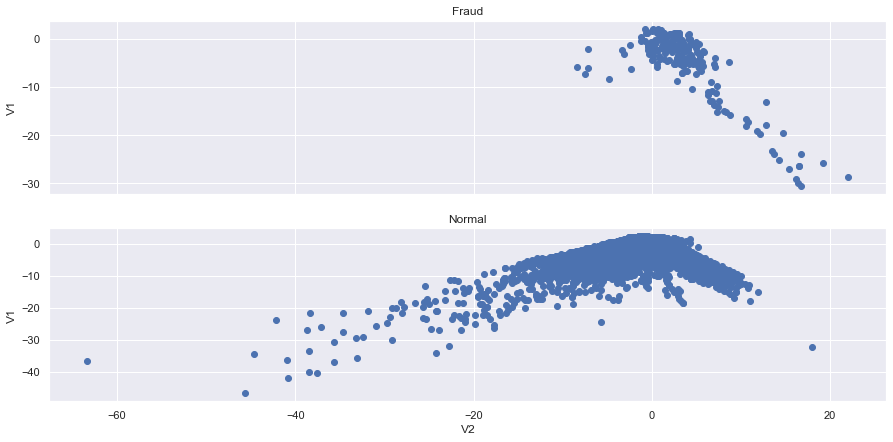

In [52]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,7),sharex=True)

ax1.scatter(df_fraud['V2'],df_fraud['V1'])
ax1.set_title('Fraud')
ax1.set_ylabel('V1')

ax2.scatter(df_normal['V2'],df_normal['V1'])
ax2.set_title('Normal')
ax2.set_ylabel('V1')

ax2.set_xlabel('V2')

Text(0.5, 0, 'V2')

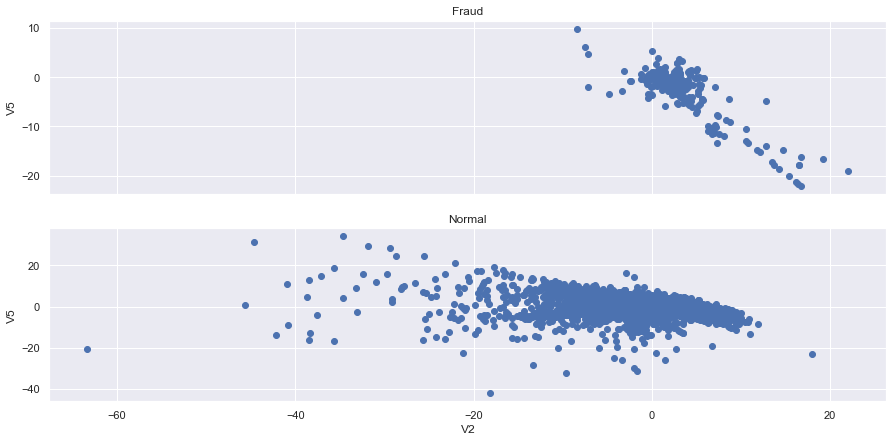

In [53]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,7),sharex=True)

ax1.scatter(df_fraud['V2'],df_fraud['V5'])
ax1.set_title('Fraud')
ax1.set_ylabel('V5')

ax2.scatter(df_normal['V2'],df_normal['V5'])
ax2.set_title('Normal')
ax2.set_ylabel('V5')

ax2.set_xlabel('V2')

Text(0.5, 0, 'V1')

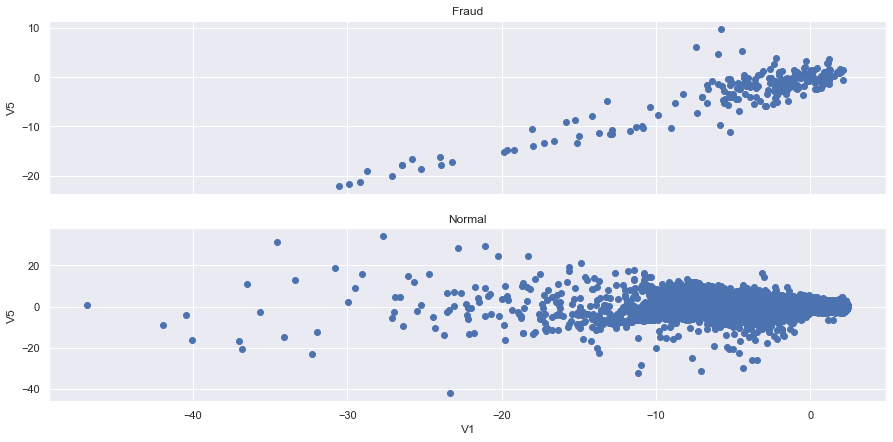

In [54]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,7),sharex=True)

ax1.scatter(df_fraud['V1'],df_fraud['V5'])
ax1.set_title('Fraud')
ax1.set_ylabel('V5')

ax2.scatter(df_normal['V1'],df_normal['V5'])
ax2.set_title('Normal')
ax2.set_ylabel('V5')

ax2.set_xlabel('V1')

### Split the data into Dependent and Independent features

In [55]:
y = df['Class']
X = df.drop(columns=['Class'])

In [56]:
## We have to calculate the contamination for the isolation forest, which is the outlier fraction
outlier_frac = len(df_fraud)/len(df_normal)
outlier_frac

0.0017116863627837178

### Apply Isolation Forest algorithm

In [57]:
from sklearn.ensemble import IsolationForest

forest = IsolationForest(n_estimators=100,n_jobs=-1,random_state=9, contamination=outlier_frac)
forest.fit(X,y)

def convert(y_pred):
    y_pred[y_pred==1] = 0
    y_pred[y_pred==-1] = 1
    return y_pred

def forest_predict(X):
    y_pred = forest.predict(X)
    y_pred = convert(y_pred)
    print('Detected: ', (y_pred==1).sum(), ' outliers out of ', (y==1).sum())
    print('Total Errors: ', (y != y_pred).sum())
    return y_pred

c:\Users\DARIUS\anaconda3\envs\Statisteks\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [58]:
y_pred = forest_predict(X)

Detected:  220  outliers out of  219
Total Errors:  353


In [59]:
from sklearn.metrics import accuracy_score, classification_report, fbeta_score

print(fbeta_score(y,y_pred,beta=2))
print(classification_report(y,y_pred))
print()

0.19616788321167883
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127944
           1       0.20      0.20      0.20       219

    accuracy                           1.00    128163
   macro avg       0.60      0.60      0.60    128163
weighted avg       1.00      1.00      1.00    128163




### OneClassSVM

In [60]:
from sklearn.svm import OneClassSVM

In [61]:
#svm = OneClassSVM(kernel='sigmoid',gamma='auto')
#svm.fit(X,y)
#y_pred_svm = svm.predict(X)

In [62]:
#y_pred_svm = convert(y_pred_svm)
#print('Detected: ', (y_pred_svm==1).sum(), ' outliers out of ', (y==1).sum())
#print('Total Errors: ', (y != y_pred_svm).sum())

Detected:  2848  outliers out of  6
Total Errors:  2842

Not Good!!!

### Local Outlier Factor

In [63]:
from sklearn.neighbors import LocalOutlierFactor
def lof(X,y):
    classifier = LocalOutlierFactor(n_neighbors=30, n_jobs=-1,algorithm='auto',contamination=outlier_frac)
    y_pred_lof = classifier.fit_predict(X,y)
    y_pred_lof = convert(y_pred_lof)
    print('Detected: ', (y_pred_lof==1).sum(), ' outliers out of ', (y==1).sum())
    print('Total Errors: ', (y != y_pred_lof).sum())
    return y_pred_lof


In [64]:
y_pred_lof = lof(X,y)

Detected:  220  outliers out of  219
Total Errors:  437


In [65]:
print(fbeta_score(y,y_pred_lof,beta=1,average='binary'))
print(classification_report(y,y_pred_lof))
print()

0.004555808656036446
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127944
           1       0.00      0.00      0.00       219

    accuracy                           1.00    128163
   macro avg       0.50      0.50      0.50    128163
weighted avg       1.00      1.00      1.00    128163




Various Plots

In [66]:
def some_plot(y_pred, new_col_name):
    df_tmp = df.copy()
    df_tmp[new_col_name] = y_pred
    df_tmp

    fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,9), sharex=True)
    fig.suptitle('Pair Plots')
    fig.align_labels()
    ax1.scatter(df_tmp[df_tmp['Class']==1]['V2'],df_tmp[df_tmp['Class']==1]['V5'],color='b')
    ax1.scatter(df_tmp[df_tmp[new_col_name]==1]['V2'],df_tmp[df_tmp[new_col_name]==1]['V5'],color='r')
    ax1.set_ylabel('V5')
    ax1.set_xlabel('V2')


    ax2.scatter(df_tmp[df_tmp['Class']==1]['V1'],df_tmp[df_tmp['Class']==1]['V5'],color='b')
    ax2.scatter(df_tmp[df_tmp[new_col_name]==1]['V1'],df_tmp[df_tmp[new_col_name]==1]['V5'],color='r')
    ax2.set_ylabel('V5')
    ax2.set_xlabel('V1')

    ax3.scatter(df_tmp[df_tmp['Class']==1]['V1'],df_tmp[df_tmp['Class']==1]['V2'],color='b')
    ax3.scatter(df_tmp[df_tmp[new_col_name]==1]['V1'],df_tmp[df_tmp[new_col_name]==1]['V2'],color='r')
    ax3.set_ylabel('V2')
    ax3.set_xlabel('V1')

    plt.legend(['Actual', 'Predicted'])

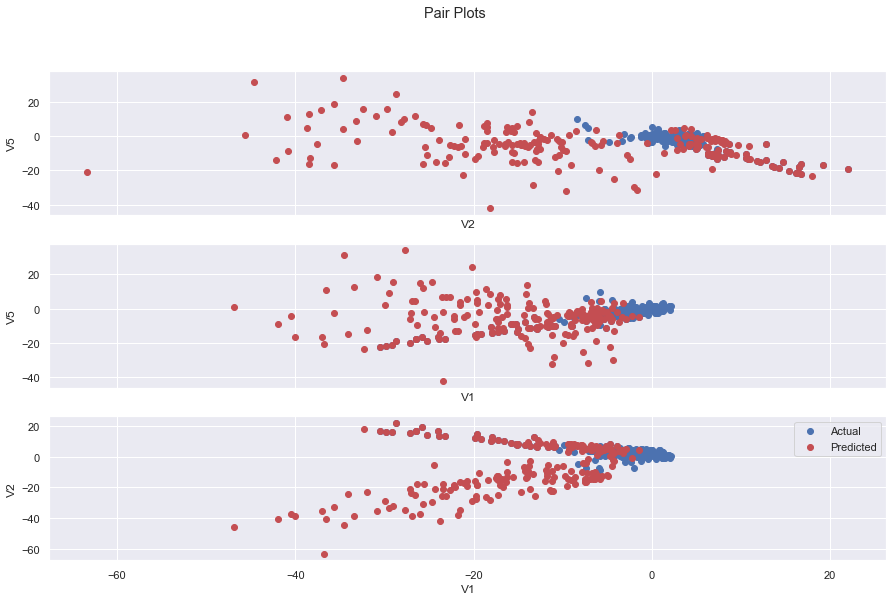

In [67]:
some_plot(y_pred,'Forest')

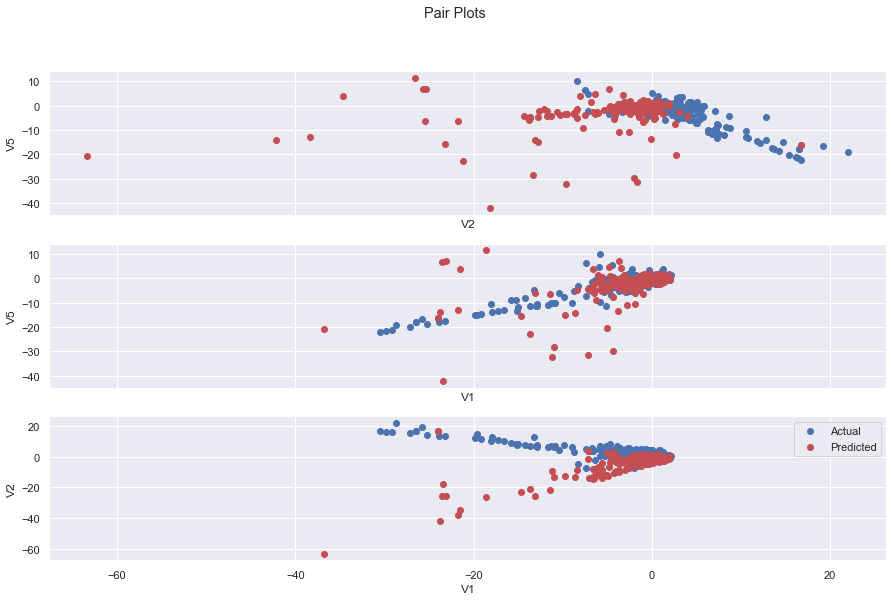

In [68]:
some_plot(y_pred_lof,'lof')

Text(0, 0.5, 'V5')

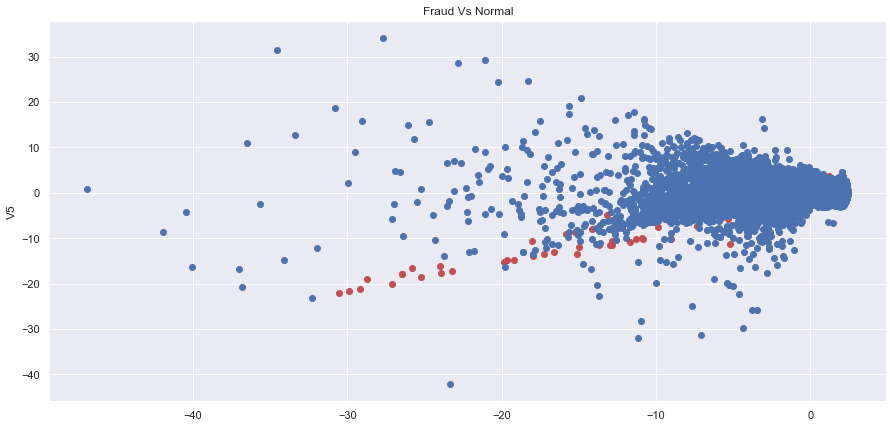

In [69]:
fig, ax1 = plt.subplots(1,1, figsize=(15,7),sharex=True)

ax1.scatter(df_fraud['V1'],df_fraud['V5'],color='r')
ax1.scatter(df_normal['V1'],df_normal['V5'],color='b')
ax1.set_title('Fraud Vs Normal')
ax2.set_xlabel('V1')
ax1.set_ylabel('V5')


Text(0, 0.5, 'V5')

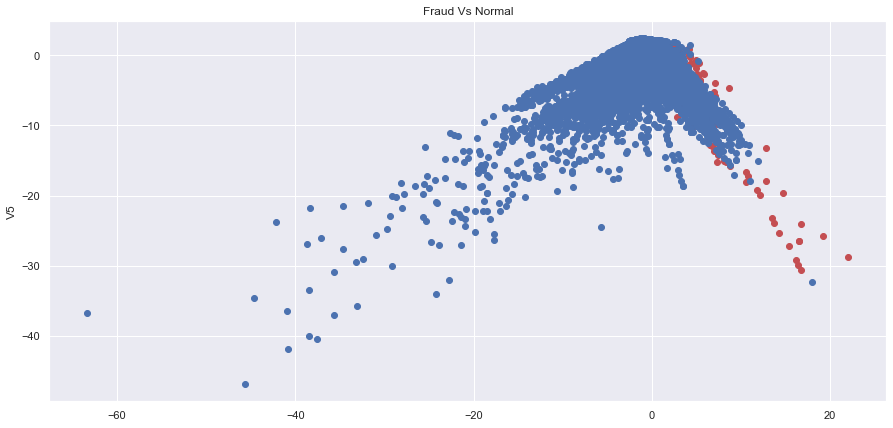

In [70]:
fig, ax1 = plt.subplots(1,1, figsize=(15,7),sharex=True)

ax1.scatter(df_fraud['V2'],df_fraud['V1'],color='r')
ax1.scatter(df_normal['V2'],df_normal['V1'],color='b')
ax1.set_title('Fraud Vs Normal')
ax2.set_xlabel('V1')
ax1.set_ylabel('V5')

## Another Approach

We will try to predict the output using Logistic Regression

In [71]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

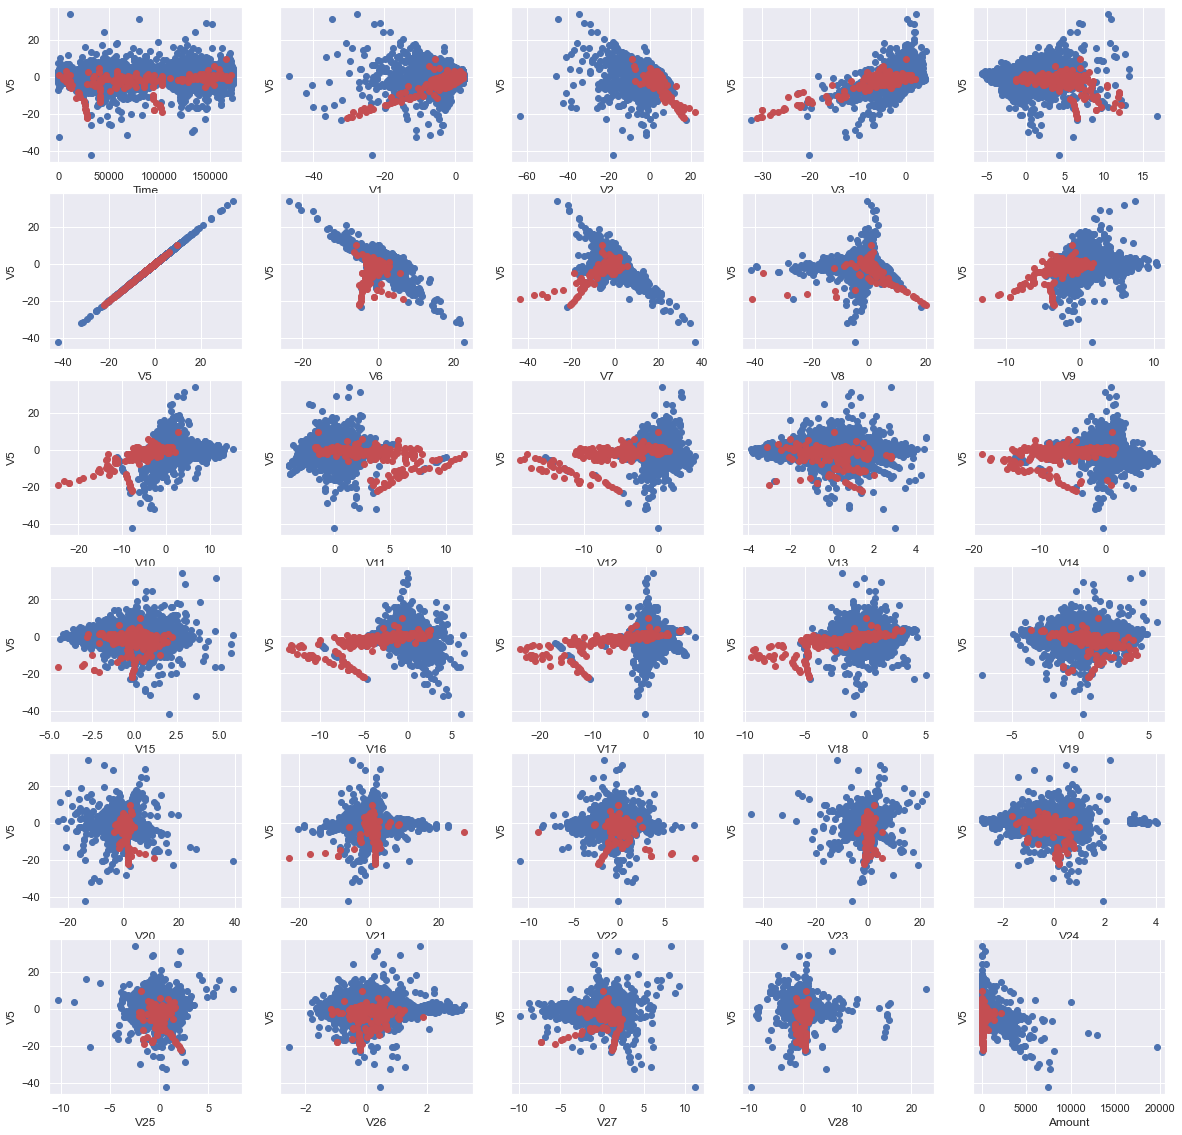

In [72]:
current_ax = 0
row=0
fig, axes = plt.subplots(6,5,figsize=(20,20),sharex=False,sharey=True)

for col in df.columns[:-1]:
    axes[row, current_ax].scatter(x=col,y='V5', data=df[df['Class']==0],color='b')
    axes[row, current_ax].scatter(x=col,y='V5', data=df[df['Class']==1],color='r')
    axes[row, current_ax].set_xlabel(col)
    axes[row, current_ax].set_ylabel('V5')
    current_ax += 1
    if current_ax == 5:
        row += 1
        current_ax = 0
        if row == 7:
            break

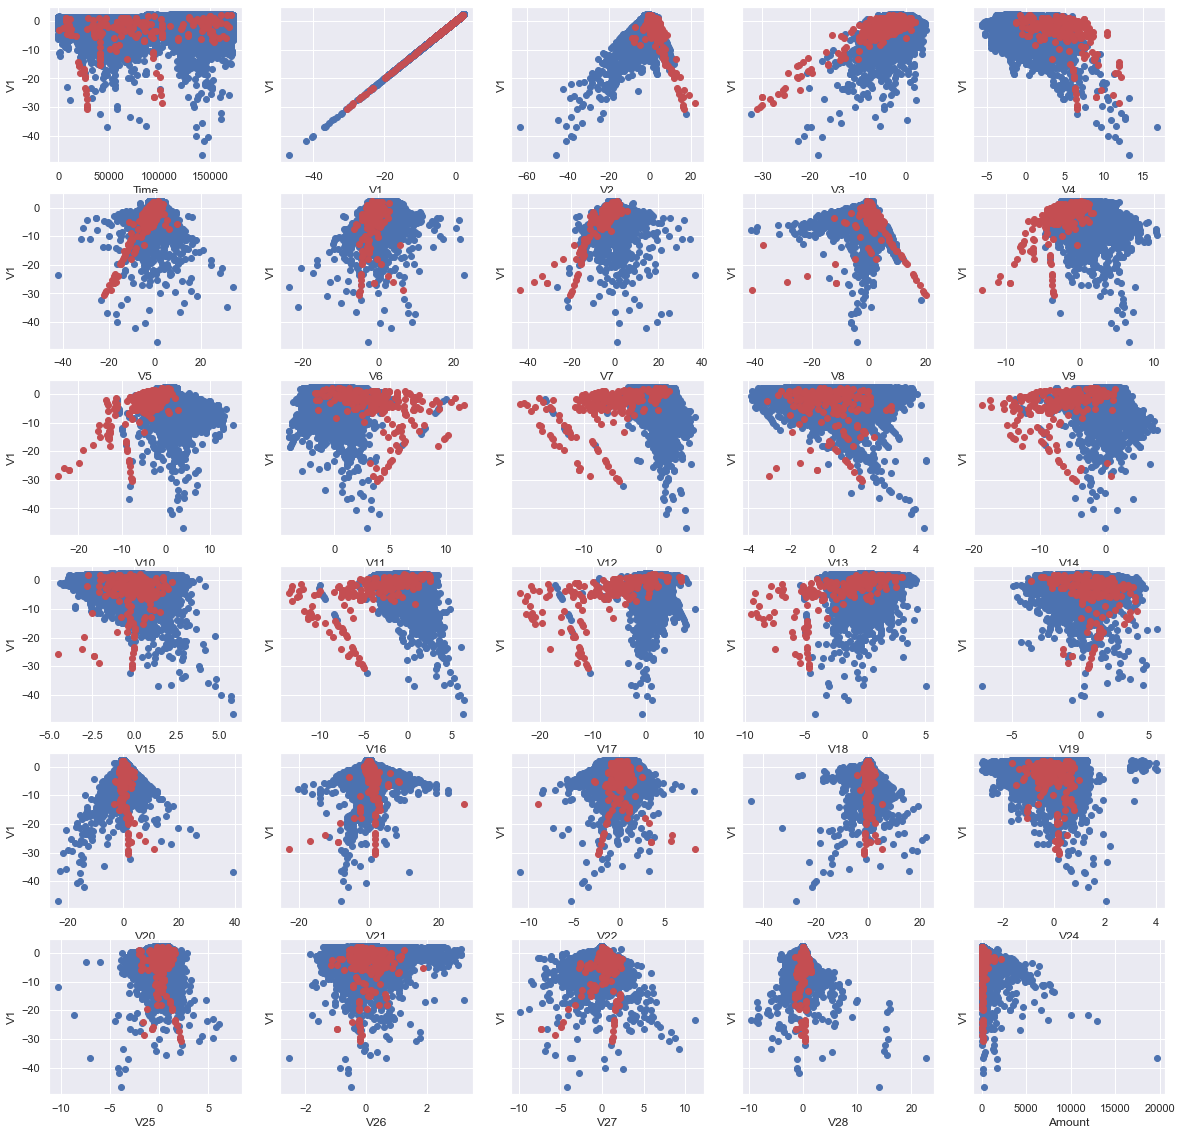

In [73]:
current_ax = 0
row=0
fig, axes = plt.subplots(6,5,figsize=(20,20),sharex=False,sharey=True)

for col in df.columns[:-1]:
    axes[row, current_ax].scatter(x=col,y='V1', data=df[df['Class']==0],color='b')
    axes[row, current_ax].scatter(x=col,y='V1', data=df[df['Class']==1],color='r')
    axes[row, current_ax].set_xlabel(col)
    axes[row, current_ax].set_ylabel('V1')
    current_ax += 1
    if current_ax == 5:
        row += 1
        current_ax = 0
        if row == 7:
            break

In [74]:
y.value_counts()

0    127944
1       219
Name: Class, dtype: int64

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

log_reg = LogisticRegression()
scaler = StandardScaler()
X = scaler.fit_transform(X)
log_reg.fit(X,y)
y_pred_log = log_reg.predict(X)


In [76]:
(y_pred_log == 1).sum()

161

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def performance_metrics(y_test,y_pred):
    print('Detected: ', (y_test!=y_pred).sum(), ' outliers out of: ', (y_test==1).sum())
    print('Total errors: ', (y_test!=y_pred).sum())
    print(confusion_matrix(y_test,y_pred))
    print('f2 score: ', fbeta_score(y_test,y_pred,beta=2))
    print(classification_report(y_test,y_pred))

In [78]:
performance_metrics(y,y_pred_log)

Detected:  96  outliers out of:  219
Total errors:  96
[[127925     19]
 [    77    142]]
f2 score:  0.6846673095467695
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127944
           1       0.88      0.65      0.75       219

    accuracy                           1.00    128163
   macro avg       0.94      0.82      0.87    128163
weighted avg       1.00      1.00      1.00    128163



In [79]:
performance_metrics(y,y_pred)

Detected:  353  outliers out of:  219
Total errors:  353
[[127767    177]
 [   176     43]]
f2 score:  0.19616788321167883
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127944
           1       0.20      0.20      0.20       219

    accuracy                           1.00    128163
   macro avg       0.60      0.60      0.60    128163
weighted avg       1.00      1.00      1.00    128163



### We can clearly see that the logistic regression is the best. Reasons for that:
- Low Type II Error - which is the most important parameter in fraud detection
- Good Recall score
- Good F2 score
